<a href="https://colab.research.google.com/github/Yahia-M/PREDICT-CRIME-RATE-IN-CHICAGO/blob/master/PREDICTING_CRIME_RATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content

ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [0]:
#!pip install fbprophet

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [0]:
chicago_df_1= pd.read_csv("Chicago_Crimes_2005_to_2007.csv",error_bad_lines = False,engine="python")
chicago_df_2= pd.read_csv("Chicago_Crimes_2008_to_2011.csv",error_bad_lines = False,engine="python")
chicago_df_3= pd.read_csv("Chicago_Crimes_2012_to_2017.csv",error_bad_lines = False,engine="python")


In [0]:
chicago_df =pd.concat([chicago_df_1,chicago_df_2,chicago_df_3], ignore_index=False, axis=0)

In [46]:
chicago_df_1.shape

(487835, 23)

In [47]:
chicago_df_2.shape

(485848, 23)

In [48]:
chicago_df_3.shape


(490668, 23)

In [49]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1622.0,16.0,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,321.0,3.0,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,321.0,3.0,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,1633.0,16.0,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,822.0,8.0,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,False,734.0,7.0,17.0,67.0,08A,1167688.0,1855998.0,2006.0,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,1623.0,16.0,45.0,11.0,08B,1140791.0,1932993.0,2006.0,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,False,832.0,8.0,15.0,66.0,06,1160205.0,1859776.0,2006.0,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,1322.0,12.0,32.0,24.0,08A,1163122.0,1905349.0,2006.0,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,312.0,3.0,20.0,42.0,08B,1180669.0,1863047.0,2006.0,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


In [50]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
490658,2825509,9088903,HW233804,04/15/2013 02:00:00 AM,074XX N ASHLAND BLVD,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,2422.0,24.0,49.0,1.0,14,1164416.0,1949315.0,2013.0,02/04/2016 06:33:39 AM,42.016540,-87.670332,"(42.01654009, -87.670331862)"
490659,2825510,9088904,HW233470,04/15/2013 03:00:00 AM,006XX N LEAMINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,1532.0,15.0,28.0,25.0,14,1141911.0,1903823.0,2013.0,02/04/2016 06:33:39 AM,41.892154,-87.754276,"(41.892154434, -87.754275788)"
490660,2825511,9088906,HW233766,04/15/2013 11:10:00 AM,083XX S STONY ISLAND AVE,0820,THEFT,$500 AND UNDER,SMALL RETAIL STORE,False,False,412.0,4.0,8.0,45.0,06,1188370.0,1850077.0,2013.0,02/04/2016 06:33:39 AM,41.743685,-87.585372,"(41.743685011, -87.585371711)"
490661,2825512,9088912,HW233917,04/15/2013 10:00:00 AM,027XX N SHEFFIELD AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1935.0,19.0,32.0,7.0,26,1169149.0,1918348.0,2013.0,02/04/2016 06:33:39 AM,41.931464,-87.653820,"(41.931463882, -87.653819694)"
490662,2825513,9088913,HW219112,04/04/2013 01:18:44 PM,060XX S ELIZABETH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,713.0,7.0,16.0,67.0,18,1169022.0,1864776.0,2013.0,02/04/2016 06:33:39 AM,41.784461,-87.655840,"(41.784460588, -87.655839808)"
490663,2825514,9088916,HW233900,01/01/2013 12:00:00 PM,023XX N LOREL AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,True,False,2515.0,25.0,37.0,19.0,20,1140330.0,1915076.0,2013.0,02/04/2016 06:33:39 AM,41.923063,-87.759806,"(41.923063091, -87.759805878)"
490664,2825515,9088917,HW233540,04/15/2013 12:01:00 AM,058XX N WINTHROP AVE,0810,THEFT,OVER $500,APARTMENT,False,False,2022.0,20.0,48.0,77.0,06,1167808.0,1938940.0,2013.0,02/04/2016 06:33:39 AM,41.987998,-87.658151,"(41.987998148, -87.658151366)"
490665,2825516,9088918,HW233842,04/14/2013 12:01:00 AM,074XX N ASHLAND BLVD,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2422.0,24.0,49.0,1.0,14,1164416.0,1949315.0,2013.0,02/04/2016 06:33:39 AM,42.016540,-87.670332,"(42.01654009, -87.670331862)"
490666,2825517,9088919,HW233817,04/15/2013 12:00:00 PM,011XX N LAWNDALE AVE,0580,STALKING,SIMPLE,APARTMENT,True,True,1112.0,11.0,27.0,23.0,08A,1151500.0,1907389.0,2013.0,02/04/2016 06:33:39 AM,41.901757,-87.718965,"(41.901756915, -87.718965411)"
490667,2825518,9088922,HW233808,04/15/2013 11:30:00 AM,040XX W JACKSO,None,None,None,None,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,NaN,None


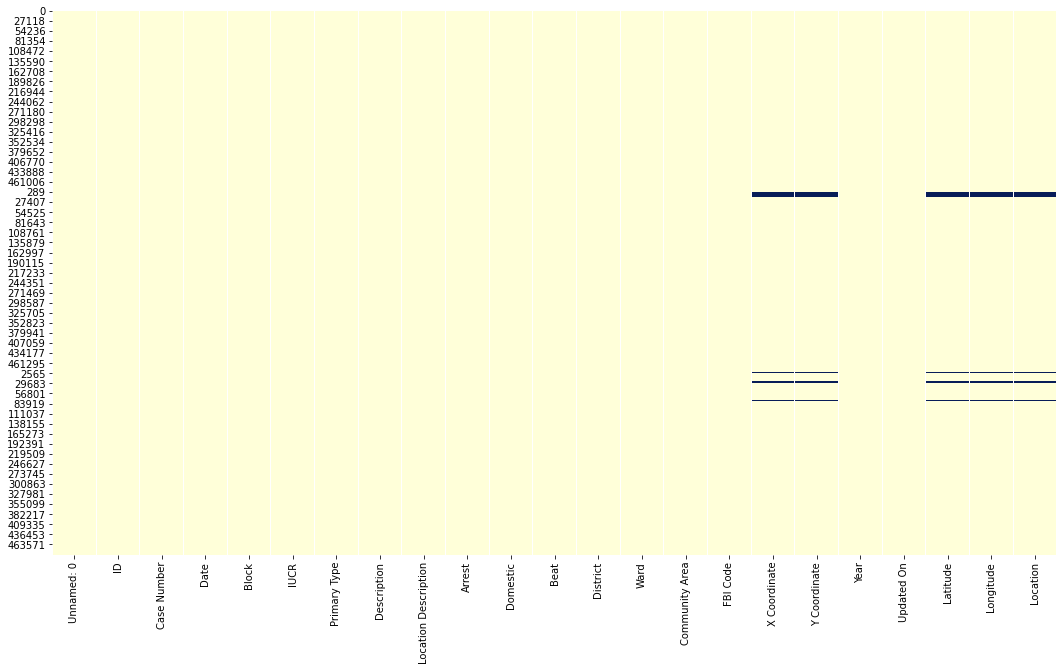

In [51]:
plt.figure(figsize=(18,10))
sns.heatmap(chicago_df.isnull(),cbar=False,cmap='YlGnBu')

In [0]:
chicago_df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [0]:
chicago_df.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code', 'Beat', 'Community Area', 'Location', 'Latitude',
       'Longitude', 'District'],inplace=True,axis=1)

In [0]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [54]:
chicago_df.Date

0        2006-04-02 13:00:00
1        2006-02-26 13:40:48
2        2006-01-08 23:16:00
3        2006-04-05 18:45:00
4        2006-02-17 21:03:14
                 ...        
490663   2013-01-01 12:00:00
490664   2013-04-15 00:01:00
490665   2013-04-14 00:01:00
490666   2013-04-15 12:00:00
490667   2013-04-15 11:30:00
Name: Date, Length: 1464351, dtype: datetime64[ns]

In [0]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [56]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward
Date,,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,45.0
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,20.0
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,5.0
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,38.0
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,13.0
...,...,...,...,...,...,...,...,...
2013-01-01 12:00:00,2013-01-01 12:00:00,023XX N LOREL AVE,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,True,False,37.0
2013-04-15 00:01:00,2013-04-15 00:01:00,058XX N WINTHROP AVE,THEFT,OVER $500,APARTMENT,False,False,48.0
2013-04-14 00:01:00,2013-04-14 00:01:00,074XX N ASHLAND BLVD,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,49.0


In [57]:
chicago_df['Primary Type'].value_counts()

THEFT                                299110
BATTERY                              261626
NARCOTICS                            174604
CRIMINAL DAMAGE                      171227
OTHER OFFENSE                         88224
ASSAULT                               87034
BURGLARY                              86637
MOTOR VEHICLE THEFT                   66997
ROBBERY                               55100
DECEPTIVE PRACTICE                    53198
CRIMINAL TRESPASS                     42191
PROSTITUTION                          17016
WEAPONS VIOLATION                     14445
PUBLIC PEACE VIOLATION                11433
OFFENSE INVOLVING CHILDREN             9575
CRIM SEXUAL ASSAULT                    5366
SEX OFFENSE                            4821
GAMBLING                               3618
INTERFERENCE WITH PUBLIC OFFICER       3455
LIQUOR LAW VIOLATION                   3219
ARSON                                  2214
KIDNAPPING                             1143
INTIMIDATION                    

In [58]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         299110
BATTERY                       261626
NARCOTICS                     174604
CRIMINAL DAMAGE               171227
OTHER OFFENSE                  88224
ASSAULT                        87034
BURGLARY                       86637
MOTOR VEHICLE THEFT            66997
ROBBERY                        55100
DECEPTIVE PRACTICE             53198
CRIMINAL TRESPASS              42191
PROSTITUTION                   17016
WEAPONS VIOLATION              14445
PUBLIC PEACE VIOLATION         11433
OFFENSE INVOLVING CHILDREN      9575
Name: Primary Type, dtype: int64

In [0]:
order_data=chicago_df['Primary Type'].value_counts().iloc[:15].index

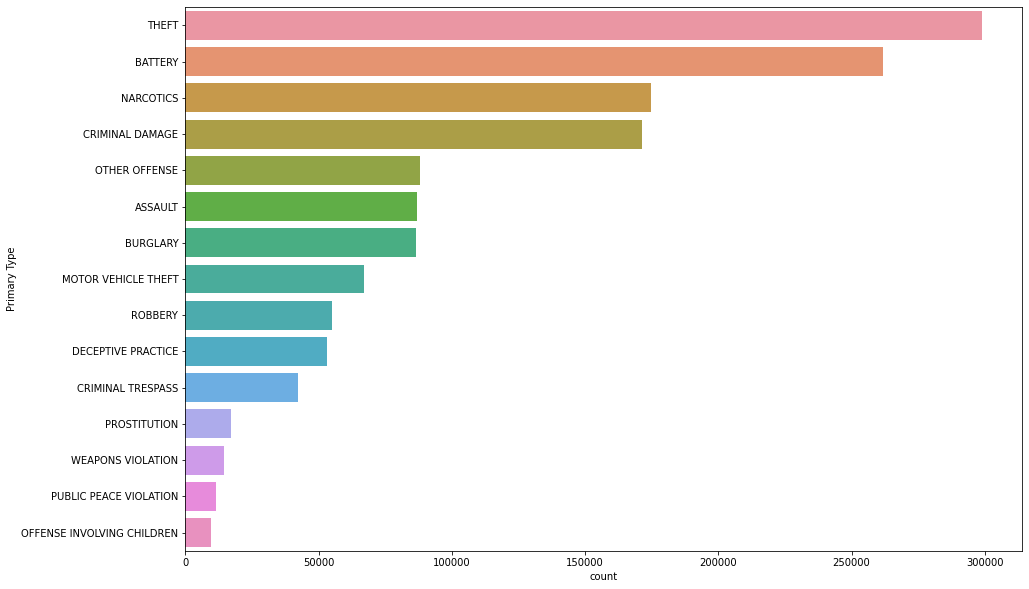

In [60]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=chicago_df, order=order_data)

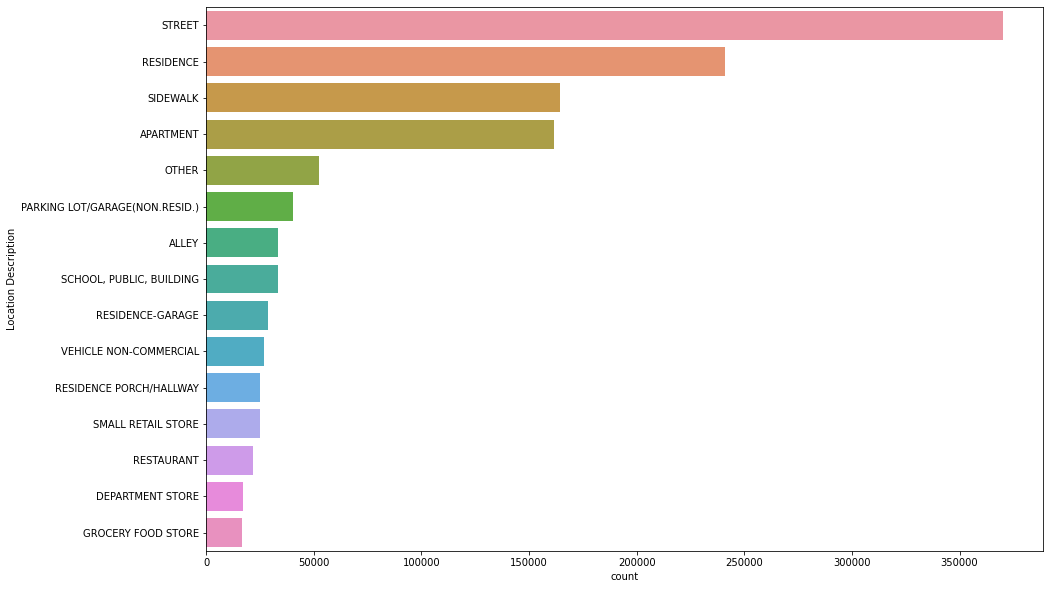

In [61]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=chicago_df, order=chicago_df['Location Description'].value_counts().iloc[:15].index)

In [62]:
chicago_df.resample('Y').size()

Date
2005-12-31      2104
2006-12-31    346114
2007-12-31    139617
2008-12-31    424804
2009-12-31     59016
2010-12-31      1493
2011-12-31       535
2012-12-31    333602
2013-12-31     82421
2014-12-31      4151
2015-12-31     47454
2016-12-31     23040
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number Of Crimes')

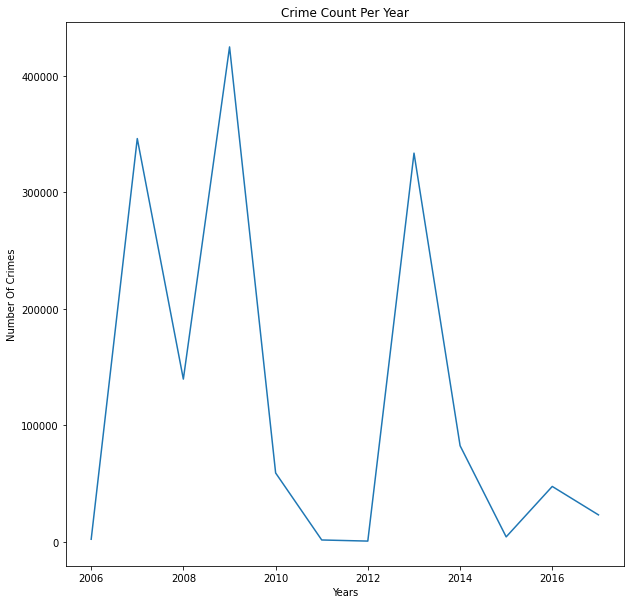

In [63]:
plt.figure(figsize=(10,10))
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number Of Crimes')

Text(0, 0.5, 'Number Of Crimes')

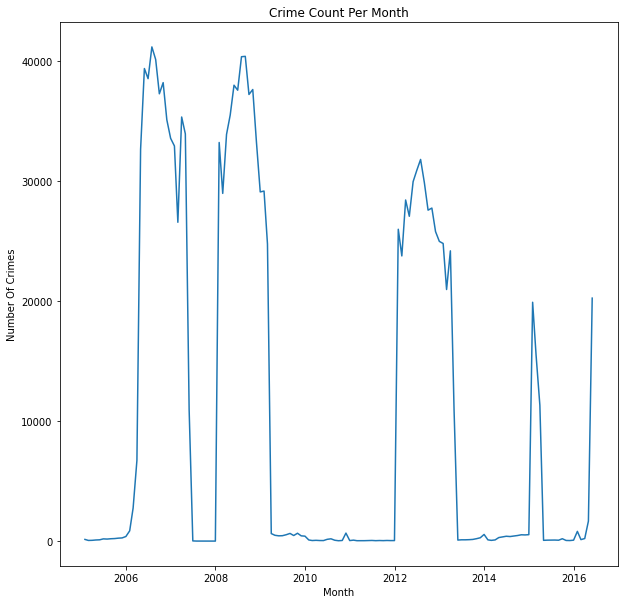

In [64]:
plt.figure(figsize=(10,10))
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Month')
plt.xlabel('Month')
plt.ylabel('Number Of Crimes')

Text(0, 0.5, 'Number Of Crimes')

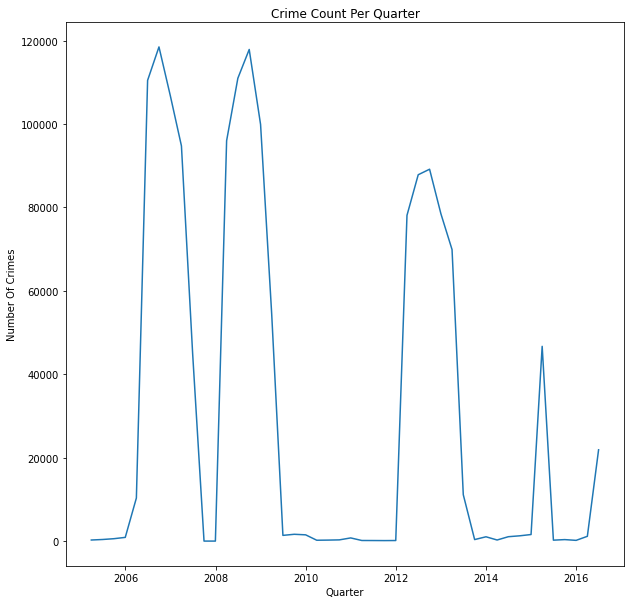

In [65]:
plt.figure(figsize=(10,10))
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number Of Crimes')

## Preparing our Data

In [0]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [67]:
chicago_prophet

,Date,0
0,2005-01-31,139
1,2005-02-28,55
2,2005-03-31,64
3,2005-04-30,92
4,2005-05-31,106
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [0]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [69]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,139
1,2005-02-28,55
2,2005-03-31,64
3,2005-04-30,92
4,2005-05-31,106
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [0]:
chicago_prophet_final = chicago_prophet.rename(columns={"Date":'ds','Crime Count':'y'})

In [71]:
chicago_prophet_final

,ds,y
0,2005-01-31,139
1,2005-02-28,55
2,2005-03-31,64
3,2005-04-30,92
4,2005-05-31,106
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [72]:
m = Prophet()
m.fit(chicago_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods= 365)
forecast = m.predict(future)

In [74]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,17360.511641,2147.465270,37485.544762,17360.511641,17360.511641,2864.215181,2864.215181,2864.215181,2864.215181,2864.215181,2864.215181,0.0,0.0,0.0,20224.726822
1,2005-02-28,17272.583795,1590.570361,37019.899787,17272.583795,17272.583795,1239.562061,1239.562061,1239.562061,1239.562061,1239.562061,1239.562061,0.0,0.0,0.0,18512.145856
2,2005-03-31,17175.235108,1476.799013,35823.589521,17175.235108,17175.235108,1051.114935,1051.114935,1051.114935,1051.114935,1051.114935,1051.114935,0.0,0.0,0.0,18226.350043
3,2005-04-30,17081.026701,380.443288,35332.357628,17081.026701,17081.026701,1271.548631,1271.548631,1271.548631,1271.548631,1271.548631,1271.548631,0.0,0.0,0.0,18352.575332
4,2005-05-31,16983.678015,552.538403,36212.104495,16983.678015,16983.678015,1175.486701,1175.486701,1175.486701,1175.486701,1175.486701,1175.486701,0.0,0.0,0.0,18159.164716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-05-27,3033.029446,-15473.233981,21048.208149,3032.040505,3033.924555,-355.350862,-355.350862,-355.350862,-355.350862,-355.350862,-355.350862,0.0,0.0,0.0,2677.678585
498,2017-05-28,3029.837123,-14062.226296,21280.344461,3028.847621,3030.735576,21.898456,21.898456,21.898456,21.898456,21.898456,21.898456,0.0,0.0,0.0,3051.735579
499,2017-05-29,3026.644799,-14597.647350,20774.543736,3025.649591,3027.546596,407.459182,407.459182,407.459182,407.459182,407.459182,407.459182,0.0,0.0,0.0,3434.103981
500,2017-05-30,3023.452476,-13887.068871,21566.571642,3022.448611,3024.359433,794.353042,794.353042,794.353042,794.353042,794.353042,794.353042,0.0,0.0,0.0,3817.805518


<Figure size 720x720 with 0 Axes>

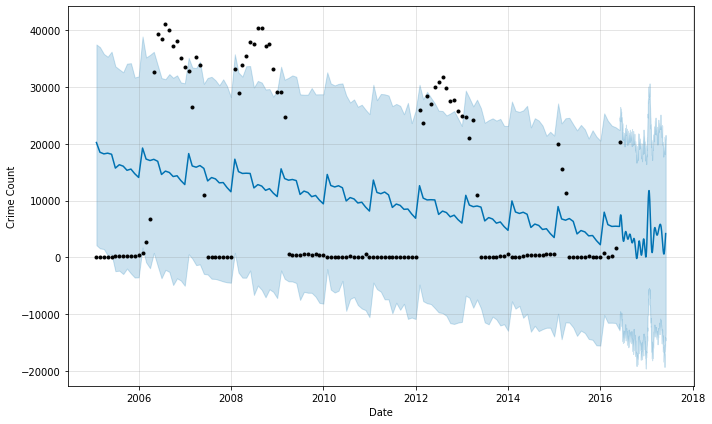

In [78]:
plt.figure(figsize=(10,10))
figure = m.plot(forecast , xlabel='Date',ylabel='Crime Count')

## Make a prediction for two years

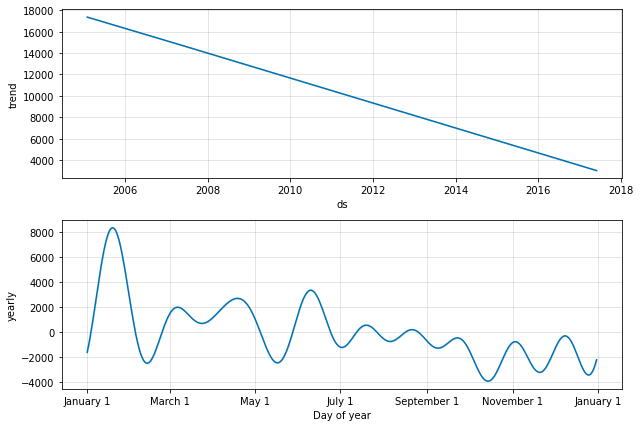

In [79]:
figure3 = m.plot_components(forecast)

In [0]:
future_2y = m.make_future_dataframe(periods= 365*2)
forecast_2y = m.predict(future_2y)

<Figure size 720x720 with 0 Axes>

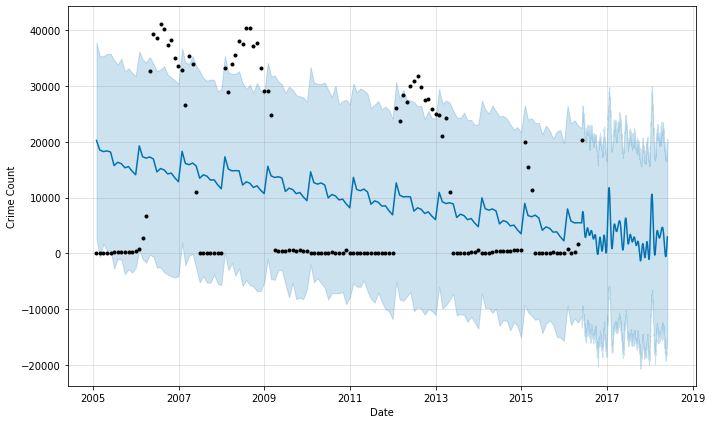

In [82]:
plt.figure(figsize=(10,10))
figure = m.plot(forecast_2y , xlabel='Date',ylabel='Crime Count')